# Imports

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Read tsv

### Open the tsv

In [2]:
# Data from http://konect.cc/networks/brunson_revolution/
f = open("AmericanRevolution.tsv","r")
text = f.readlines()

### Cleans the data

In [3]:
clean = lambda x:x.strip("\n").split(" ")
node_pairs = list(map(clean,text[2:]))
node_pairs = [(int(x[0]),int(x[1])) for x in node_pairs]
node_pairs[:4]

[(1, 1), (1, 2), (2, 1), (2, 2)]

# Converting edge pairs to NetworkX graph

In [4]:
G = nx.Graph()
G.clear()
G.add_edges_from(node_pairs)

# Degree Distribution

(array([   0.,  115.,   13.,    2.,    1.,    0.,    0.,    0.,    0.,    0.]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.]),
 <a list of 10 Patch objects>)

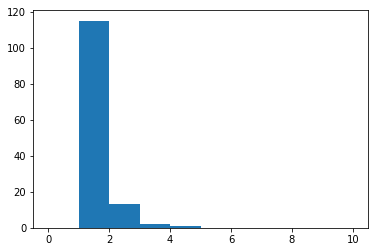

In [5]:
node_degrees = [x[1] for x in sorted(G.degree())]
plt.hist(node_degrees, bins = np.linspace(0,10,11))

##### Conclusions:
##### The graph is connected (no zero degree nodes), and all nodes have degree >= 3
##### All values for
##### A few outliers have up to 10 roads

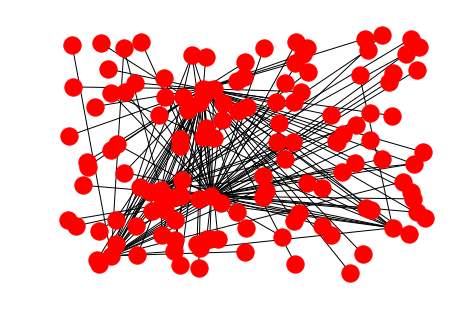

In [6]:
nx.draw_random(G)

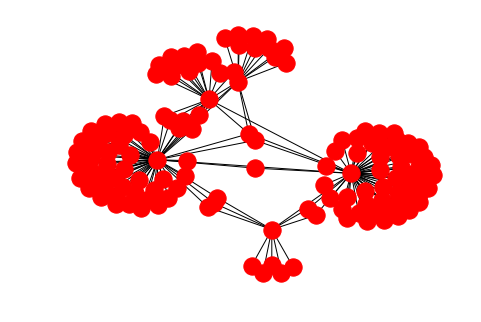

In [8]:
# The plot below uses a technique called "Force directed Graph Drawing", but the result isn't particularly beautiful.
# We can see the main parties by the number of people connected to them.
nx.draw_spring(G)

In [9]:
# This graph should be bipartite according to http://konect.cc/networks/brunson_revolution/
nx.bipartite.color(G)

NetworkXError: Graph is not bipartite.